In Data Science much of the data arrives in the form of what one might call tabular or Excel-like structure which is convenenient for importing into a data frame. This then makes it realtively straightforward to use as input with traditional modeling approaches such as regression, support vector machines, decision trees, and naive bayes. 

<img src="pics/ml_graph.png" width ="600" height=600>


Moreover, if the data size is manageable on your local computer then maybe sticking with these approaches is fine. On the other hand, we can in fact use Deep Learning tools in the modeling of simple data structures, it's just that it might be over kill. Nonetheless, there are plenty of organizations who more or less do everything with DL approaches under the premise that it centralizes thinking and activity around a basic set of tools. The discussion then becomes about:

- model architectures
- batch sizes
- activation functions
- cost functions
- learning rates
- regularization

<img src="pics/dlpubs.png" width ="600" height=600>



## Different Frameworks

<img src="pics/threeframe.png" width ="600" height=600>

<img src="pics/gtrendlegend.png" width ="600" height=600>

<img src="pics/gtrend.png" width ="600" height=600>

<img src="pics/pytorchg.png" width ="600" height=600>

<img src="pics/keras.png" width ="600" height=600>


## Associated Concepts

So while a committment is made to Deep Learning it doesn't then mean that the considerations are few and simple. Deep Learning is ususally discussed in contexts where the data is unstructured to the extent that it is not so easy to "mold" it into the tpyical tabular approach. Or if you can, then you have to create a containing super-structure to manage it in total. We could use tools like Python's **numpy** module because it does in fact allow us to flexibly represent data in interesting ways that facilitate computational efficiency. However, it does not run on GPUs which are the next generation processors for aggressive and at-scale computing. 

This need has led, in part, to the development of things like tensors which allow us to represent unstructured data as arrays of matrices, or arrays of arrays, with all the underlying connectivity (via graphs) being maintained for you so yo don't have to worry about that. Then you can present this structure to Deep Learning networks such as TensorFlow, Keras (which sits on top of Tensorflow), and of course PyTorch. 

Note that using arrays of arrays/matrices is not a new thing altough calculations of this sort used to require very large "mainframes" though now we can run them on laptops. Moever, using tensors gives us efficiencies that allow is to run on both CPUs and GPU without having to change our code. Lastly, tensors, at least as implemented by PyTorch and Tensorflow, can have linkages in the for of Directed Graphs which means they can keep track out calculations over time. 

<img src="pics/tensors.png" width ="600" height=600>

<small>https://www.freecodecamp.org/news/get-to-know-tensorflow-js-in-7-minutes-afcd0dfd3d2f/</small>

One thing to know is that many times people will use the words **arrays** and **matrices** synonymously. In my view this should not be the case but people smarter than me do it all the time so maybe they know something I don't.

<img src="pics/moretens.png" width ="600" height=600>

However, it is fair to say that Deep Learning is more commonly used in non-traditional contexts such as image classification and object recognition, Natural Language Processing, population segmentation, as well dialogue generation and processing tools (e.g. Siri, Alexa). Also, Deep Learning shines becasue the tensor concept allows us to use at-scale and very large datasets


Libraries such as <a href="https://keras.io/">Keras</a> can "sit on top" of Tensorflow to leverage one's knowledge of Python which can make the Deep Learning experuience easier if you alreadu know Python. <a href="http://pytorch.org">PyTorch</a> is also a framework which allows use of Python as an interface language though it does not rely upon Tensorflow. Here are some benefits of PyTorch which you might recall from last week's lecture. 

- Optimize performance in both research and production by taking advantage of native support for asynchronous execution of collective operations and peer-to-peer communication that is accessible from Python and C++.
    
- PyTorch supports an end-to-end workflow from Python to deployment on iOS and Android. 

- PyTorch is well supported on major cloud platforms, providing frictionless development and easy scaling through prebuilt images, large scale training on GPUs, ability to run models in a production scale environment, and more.
    
<h3>Autograd module</h3>

<p>PyTorch uses a method called <b>automatic differentiation</b>. A recorder records what operations have performed, and then it replays it backward to compute the gradients. This method is especially powerful when building neural networks to save time on one epoch (trip through the network) by calculating differentiation of the parameters at the forward pass.</p>
    
<h3>Optim module</h3>

<b>torch.optim</b> is a module that implements various optimization algorithms used for building neural networks. Most of the commonly used methods are already supported, so there is no need to build them from scratch.

<h3>nn module</h3>

<p>PyTorch autograd makes it easy to define computational graphs and take gradients, but raw autograd can be a bit too low-level for defining complex neural networks. This is where the nn module can help. </p>

Let's continue with PyTorch and dig some more into it. In Python we tend to use numpy for manipulating matrices as it is optimized for managing large collections of numbers in a memory efficient manner while also supporting most of the common linear algebra techniques likely to be of interest to a Data Scientist. 

We can take numpy arrays and use them with PyTorch since PyTorch opens the door to using GPUs which can greatly speed up the creation of models using very large data sets. The so called "Deep Learning" revolution has involved using things like Google's <a href="https://www.tensorflow.org/">Tensorflow </a>product which requires learning approaches specific to that environment. 

<img src="pics/numpyt.png" width ="400" height=400>

If you have numpy arrays you can create tensors from them. Again, this is something we learned previously. Using tensors gives us the ability to benefit from GPUs but when looking or viewing tensors they look a lot like arrays. Benefits of tensors include:

1. Can be used with CPUs or GPUS
2. Memory efficient 
3. Have a "memory" of previous operations
4. Underneath the hood they are Connected Graphs
5. Can be treated like numpy arrays (well for the most part)
6. Can be converted back to numpy if you desire
7. Neural networks take tensors as input and produce tensors as outputs 
8. Operations within a neural network and during optimization are operations between tensors
9. All parameters (for example, weights and biases) in a neural network are tensors.

Note that some of the code herein is adapted directly or in part from https://jovian.ai/aakashns/02-linear-regression 

In [1]:
import numpy as np

inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float')

targets = np.array([56, 81, 101, 119, 133], dtype='float')

In [2]:
import torch 
import torch.nn as nn
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]], dtype=torch.float64)
tensor([ 56.,  81., 101., 119., 133.], dtype=torch.float64)


In [3]:
# Tensors can be indexed as matrices
print(inputs.shape)

# Get first three rows
print(inputs[0:3,:])

# Print type of tensor
print("Tensor of type:",inputs.dtype)

torch.Size([5, 3])
tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.]], dtype=torch.float64)
Tensor of type: torch.float64


We can reshape the tensors to suit our purposes. This is usually, of not always, motivated by an interest in some form of linear algebra computation. That is, multipling one tensor by another has to make operating sense frame a matrix multiplication point of view.

In [4]:
# Matrix multiplication NOT element wise multiplication
targets @ inputs

# but not
# inputs @ targets

tensor([41561., 42299., 27163.], dtype=torch.float64)

In [5]:
print(targets,"\n")

# Show targets as a 5 x 1 instead of 1 x 5
print(targets.view(5,-1),"\n")

# Show inputs as a 3 x 5 instead of a 5 x 3
print(inputs.view(3,-1))

tensor([ 56.,  81., 101., 119., 133.], dtype=torch.float64) 

tensor([[ 56.],
        [ 81.],
        [101.],
        [119.],
        [133.]], dtype=torch.float64) 

tensor([[ 73.,  67.,  43.,  91.,  88.],
        [ 64.,  87., 134.,  58., 102.],
        [ 43.,  37.,  69.,  96.,  70.]], dtype=torch.float64)


## Using Regression As An Example

I think everyone can easily relate to the idea of Linear Regression as a way to create a model to predict a continuous outcome. It is a favored introductory approach as:

    1) It is an easy algorithm to understand and visualize
    2) The method is well supported by a large body of literature 
    3) The diagnostic methods are well known
    
<img src="pics/regr_graph.png" width ="600" height=600>


<img src="pics/regress2.png" width ="600" height=600>




Checkout the following (taken from Andrew Ng's Deep Learning Course).

<img src="pics/predprice1.png" width ="600" height=600>

<img src="pics/predprice2.png" width ="600" height=600>

<img src="pics/predprice3.png" width ="600" height=600>


In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv"

# See YouTube video by Brian Caffo at https://www.youtube.com/watch?v=hu7FhlT_a24


## Some Actual Data

Lets look at some real data. Note this is taken from Brian Caffo's lecture. 

In [7]:
# Read in the Imaging Data - 
import pandas as pd
imaging = pd.read_csv(url)
imaging.head()

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0
4,1.580589,1.730152,-0.860949,1.245609,0.617957,0.866352,-0.099919,0.384261,0.391133,0.608826,0.071648,0.340601,0


This is imaging data. "When imaging with computed tomography (CT), there is only one intrinsic contrast mechanism, and that is the electron density of the tissues being examined. Also, with CT, one does not adjust any extrinsic contrast parameters in that the kilovolts (kV) used remains high. This is not the case, however, with MRI.

There are many intrinsic contrast mechanisms that one can use in MRI. The ones discussed in this chapter include proton (spin) density (PD), T1 relaxation time, and T2 relaxation time. Images are usually acquired for which the contrast is weighted more toward one of these parameters." https://radiologykey.com/t1-t2-and-proton-density/

So let's focus on two columns. We'll plot PD (Proton Density) vs T2 to see if there is a relationship that could reasonable be modeled using Ordinary Least Squares approach.

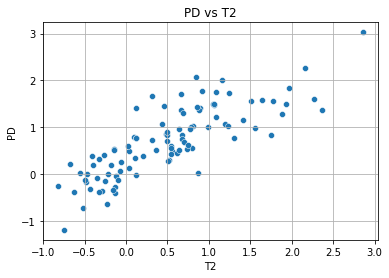

In [8]:
# Simple scatterplot
import seaborn as sns
sns.scatterplot(x=imaging['T2'],y=imaging['PD'])
plt.title("PD vs T2")
plt.grid()

So we could use the OLS method from statsmodels which does the fit and then gives us lots of information in return.

In [9]:
fit = smf.ols('PD ~ T2',data=imaging).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PD   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           9.77e-25
Time:                        14:41:08   Log-Likelihood:                -57.347
No. Observations:                 100   AIC:                             118.7
Df Residuals:                      98   BIC:                             123.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3138      0.052      6.010      0.000       0.210       0.417
T2             0.7832      0.057     13.815      0.000       0.671       0.896
==============================================================================
Omnibus:                        1.171   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.972
Skew:                           0.241   Prob(JB):                        0.615
Kurtosis:                       2.995   Cond. No.                         1.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Extract the found parameters which correspond to an intercept and a slope 
fit.params

Intercept    0.313763
T2           0.783151
dtype: float64

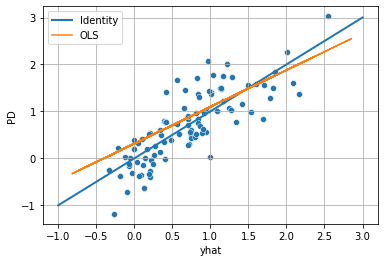

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
m = fit.params.T2
b = fit.params.Intercept
# Get the predicted y values which are approxomations of the actual u values
yhat = fit.predict(imaging['T2'])

# Plot the 
sns.scatterplot(x=yhat,y=imaging['PD'])
plt.plot([-1,3],[-1,3],linewidth=2)

#add linear regression line to scatterplot 
plt.plot(imaging['T2'], m*imaging['T2'] + b)
plt.xlabel("yhat")
plt.legend(['Identity','OLS'])
plt.grid()

In [12]:
#calculate RMSE
rmse = sqrt(mean_squared_error(imaging['PD'], m*imaging['T2'] + b)) 
print(f'OLS RMSE: {rmse:.8f}')


# Extract the slope m and intercept b from the model
m = fit.params.T2
b = fit.params.Intercept

print(m)
print(b)

OLS RMSE: 0.42935456
0.7831514763656003
0.3137632272381782


So one of the irritating things when working with tensors and numpy is that you will have to convert data structures to make them usable. It's not always clear when this needs to be done and you will encounter problems. However, you will generally see error messages that make reference to incorrect dimensions or how a certain function expects a tensor (or a numpy array).  

In [13]:
xtraining = torch.from_numpy(imaging['T2'].values)
ytraining = torch.from_numpy(imaging['PD'].values)

# So we will need to reshape the data to make it a column instead of a row
# You couls also use the unsqueeze function for this.

xtraining = xtraining.reshape(-1,1).float()
ytraining = ytraining.reshape(-1,1).float()

## Model classes

PyTorch lets us define models as object classes that can store multiple model layers. For now, though, we only need a single <tt>linear</tt> layer. This is quite easy to do here.

In [14]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim) 

    def forward(self, x):
        out = self.linear(x)
        return out


When <tt>Model</tt> is instantiated, we need to pass in the size (dimensions) of the incoming and outgoing features. For our purposes we'll use (1,1).<br><br>As above, we can see the initial hyperparameters. So we could initiate the process ourselves where we create a model instance and then immediately check the resulting weight and bias.

In [15]:
torch.manual_seed(59)
model = LinearRegressionModel(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [16]:
x = torch.tensor([2.0])
print(model.forward(x))   # equivalent to print(model(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [17]:
# Let's now try a very basic first effort
x1 = np.array([xtraining.min(),xtraining.max()])
print(x1)

#
w1 = model.linear.weight.item()
b1 = model.linear.bias.item()
y1 = x1*w1 + b1
print(y1)

[-0.8178608  2.8526049]
[0.8771208 1.26611  ]


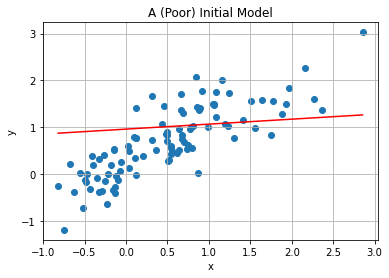

In [18]:
plt.scatter(xtraining, ytraining)
plt.plot(x1,y1,'r')
plt.title('A (Poor) Initial Model')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()

## Develop The Model

Let's further develop this model to see if we can improve the weights and biases to hopefully obtain as good as model as the OLS solution.

In [19]:
# Create a model
model = LinearRegressionModel(1,1)

## Set the loss function
We could write our own function to apply a Mean Squared Error (MSE) that follows<br>

$\begin{split}MSE &= \frac {1} {n} \sum_{i=1}^n {(y_i - \hat y_i)}^2 \\
&= \frac {1} {n} \sum_{i=1}^n {(y_i - (wx_i + b))}^2\end{split}$<br>

Fortunately PyTorch has it built in.<br>
<em>By convention, you'll see the variable name "criterion" used, but feel free to use something like "linear_loss_func" if that's clearer.</em>

In [20]:
# Setup up a loss function
loss_fn = torch.nn.MSELoss(reduction="sum")

## Set the optimization
Here we'll use <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent'>Stochastic Gradient Descent</a> (SGD) with an applied <a href='https://en.wikipedia.org/wiki/Learning_rate'>learning rate</a> (lr) of 0.0001. Recall that the learning rate tells the optimizer how much to adjust each parameter on the next round of calculations. Too large a step and we run the risk of overshooting the minimum, causing the algorithm to diverge. Too small and it will take a long time to converge.

For more information, see <a href='https://pytorch.org/docs/stable/optim.html'><strong><tt>torch.optim</tt></strong></a>

In [21]:
# Create an optimizer and specify a learning rate
optimizer = torch.optim.SGD(model.parameters(),lr=1e-4)

## Train the model
An <em>epoch</em> is a single pass through the entire dataset. We want to pick a sufficiently large number of epochs to reach a plateau close to our known parameters of $\mathrm {weight} = 0.783,\; \mathrm {bias} = 0.313$ Remember, we know what these should from our earlier use of the OLS function from statsmodels.

## Quick Review

So the following presents a summary of what we will do to full exploit the power of the Nueral Net in this example.

<div class="alert alert-success""><strong>Let's walk through the steps we're about to take:</strong><br>

1. Set a reasonably large number of passes<br>
<tt><font color=black>epochs = 400</font></tt><br>
2. Create a list to store loss values. This will let us view our progress afterward.<br>
<tt><font color=black>losses = []</font></tt><br>
<tt><font color=black>for t in range(epochs):</font></tt><br>
3. Bump "t" so that the printed report starts at 1<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;t+=1</font></tt><br>
4. Create a prediction set by running "X" through the current model parameters<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;y_pred = model.forward(X)</font></tt><br>
5. Calculate the loss<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss = criterion(y_pred, y)</font></tt><br>
6. Add the loss value to our tracking list<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;losses.append(loss)</font></tt><br>
7. Print the current line of results<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;print(f'epoch: {t:2} loss: {loss.item():10.8f}')</font></tt><br>
8. Gradients accumulate with every backprop. To prevent compounding we need to reset the stored gradient for each new epoch.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.zero_grad()</font></tt><br>
9. Now we can backprop<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss.backward()</font></tt><br>
10. Finally, we can update the hyperparameters of our model<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.step()</font></tt>
</div>

In [22]:
# Capture the losses in a list of the same name
losses = []

# Determine the number of epochs (this is subject to experimentation)
epochs = 400

# Loop through all the data for each epoch number
for t in range(epochs):
    
    # Get a prediction
    y_pred = model(xtraining)
    
    # Determine how good it was in terms of the loss function
    loss = loss_fn(y_pred,ytraining)
    
    # Track the loss for each epoch
    losses.append(loss)
    
    # This let's us print out progress for every 10 epochs
    if t%10 == 0:
        print(f'epoch: {t:2}  loss: {loss.item():10.8f}   \
              weight: {model.linear.weight.item():10.8f}  \
              bias: {model.linear.bias.item():10.8f}') 

    # Zero out the gradients so they won't carryover into subsequent iterations
    optimizer.zero_grad()
    
    # This does the back propogation
    loss.backward()
    
    # This updates the hyperparameters - in this case the weights and bias
    optimizer.step()


epoch:  0  loss: 279.87173462                 weight: -0.17026365                bias: -0.64054596
epoch: 10  loss: 164.14356995                 weight: 0.05857323                bias: -0.38710508
epoch: 20  loss: 99.67747498                 weight: 0.23036841                bias: -0.19885704
epoch: 30  loss: 63.76173019                 weight: 0.35951567                bias: -0.05919041
epoch: 40  loss: 43.74781418                 weight: 0.45676285                bias: 0.04428581
epoch: 50  loss: 32.59148788                 weight: 0.53013623                bias: 0.12081349
epoch: 60  loss: 26.36952019                 weight: 0.58563089                bias: 0.17728488
epoch: 70  loss: 22.89685059                 weight: 0.62772554                bias: 0.21883900
epoch: 80  loss: 20.95641136                 weight: 0.65976703                bias: 0.24930710
epoch: 90  loss: 19.87024307                 weight: 0.68425727                bias: 0.27154458
epoch: 100  loss: 19.26065254    

TORCH RMSE: 0.42936132


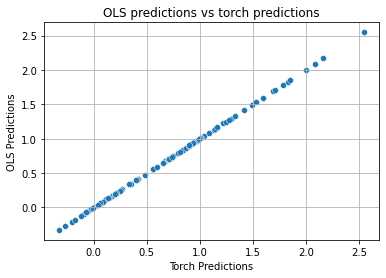

In [23]:
torchpreds = model(xtraining).detach().numpy().reshape(-1)
sns.scatterplot(x=torchpreds,y=yhat)
plt.title('OLS predictions vs torch predictions')
plt.xlabel('Torch Predictions')
plt.ylabel('OLS Predictions')
plt.grid()
#calculate RMSE

rmse = sqrt(mean_squared_error(ytraining, model(xtraining).detach().numpy().reshape(-1)))
print(f'TORCH RMSE: {rmse:.8f}')

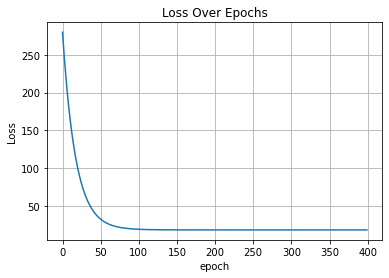

In [24]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title("Loss Over Epochs")
plt.grid()

In [25]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

# Let's recall the solution coming for the OLS appr
print("OLS solution:")
fit.params

Current weight: 0.78028202, Current bias: 0.31622428

[-0.8178608  2.8526049]
[-0.3219378  2.5420606]
OLS solution:


Intercept    0.313763
T2           0.783151
dtype: float64

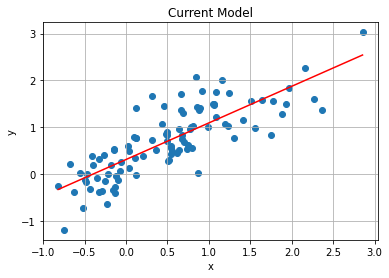

In [26]:
plt.scatter(xtraining, ytraining)
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()

Let's work with some real data. This is the California real estate data set wherein we use features of a home to predict its ultimate selling price. 

**Data Set Characteristics:**

     Number of Instances: 20640

     Number of Attributes: 8 numeric, 7 predictive features and 1 target

     Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        
The *target variable* is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/


It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297


If we want to employ a method such as regression we could do so. We could also represent the regression problem as a graph. See this [excellent blog post](https://joshuagoings.com/2020/05/05/neural-network/) for more informaton on Deep Learning as applied to Linear Regression. The figure below comes from this blog. 


<img src="pics/regr_graph.png" width ="600" height=600>


<img src="pics/regress2.png" width ="600" height=600>

We can solve this a number of ways including use of SGD Stochastic Gradient Descent which we have discussed. Thus, we can train the model using the following steps:

    Generate predictions

    Calculate the loss

    Compute gradients w.r.t the weights and biases

    Adjust the weights by subtracting a small quantity proportional to the gradient

    Reset the gradients to zero

We reduce the loss and improve our model using the gradient descent optimization algorithm

In [27]:
import numpy as np
import pandas as pd
import torch

url = "https://raw.githubusercontent.com/steviep42/bios_534_2021/main/data/cal.csv"
cal = pd.read_csv(url)
cal.shape
cal

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


So let's separate data into X (predictor variables) and the target variable being predicted which in this case will be the price of the house that was sold.

In [28]:
# Separate the target (y) from the predictors (X)

X_numpy = np.array(cal.drop('Price',axis=1), dtype='float32')
y_numpy = np.array(cal.Price, dtype='float32')

# We can use the scikit preprocessing module to normalize the inputs 
# because the features are not on the same scale

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_numpy)
X_scaled = scaler.transform(X_numpy)

<AxesSubplot:xlabel='MedInc', ylabel='Price'>

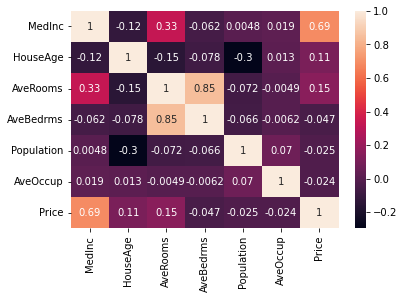

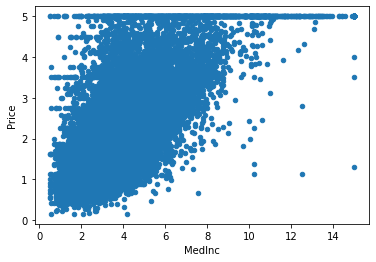

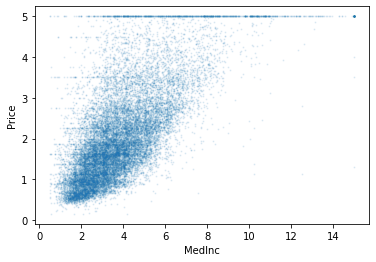

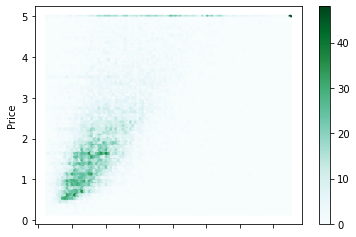

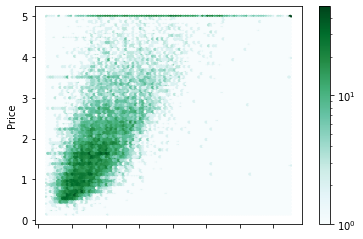

In [29]:

# Let's check for any major correlations
import seaborn as sns
corr_matrix = cal.corr()
sns.heatmap(corr_matrix,annot=True)
cal.plot.scatter(x='MedInc',y='Price')
cal.plot.scatter(x='MedInc',y='Price',alpha=0.1,s=1)
cal.plot.hexbin(x='MedInc',y='Price')
cal.plot.hexbin(x='MedInc',y='Price',bins="log")

In [ ]:
import statsmodels.formula.api as smf
import statsmodels as sm
fit = smf.ols('y_numpy ~ X_numpy',data=X_numpy).fit()
fit.summary('y_numpy ~ X_numpy')

We can then turn the predictors and targets into tensors which can be more flexibly used with GPUs, CPUs, and TPUs to benefit from greatly enhanced speed.

In [30]:
# So now we can turn the data into tensors
X = torch.from_numpy(X_scaled.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# Get the number of samples (rows) and features (columns)
n_samples, n_features = X_numpy.shape
input_size = n_features

# Sometimes you will need to reshape the target to match dimensions of 
# predictor. I don't always do this in advance - almost never in fact
# until I get an error message about shape mismtaches
y = y.view(y.shape[0],1)

So we might wish to predict the target (Price) in terms of some predictors

Price = w11 * MedInc + w12 * HouseAge + w13 * AveRooms ..... + w16 * AveOccup + b1

The weights and biases (w11, w12,... w16) can also be represented as matrices, initialized as random values. The first row of w and the first element of b are used to predict the target variable which is <b>Price</b>.The weights and biases (w11, w12,... w163, b1) can also be represented as matrices, initialized as random values. The first row of w and the first element of b are used to predict the target variable which is <b>Price</b>.



In [31]:
# Weights and biases - notice how we use the n_features to help us
# figure out how many weights we need.

w = torch.randn(1, n_features, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(w)
print(b)

ERROR! Session/line number was not unique in database. History logging moved to new session 682
tensor([[-0.8727,  0.3325, -0.4457, -0.9303,  0.1654, -0.1935]],
       requires_grad=True)
tensor([0.3101], requires_grad=True)


torch.randn creates a tensor with the given shape, with elements picked randomly from a normal distribution with mean 0 and standard deviation 1.

Our model is simply a function that performs a matrix multiplication of the inputs and the weights w (transposed) and adds the bias b (replicated for each observation).

<img src="pics/regress2.png" width ="600" height=600>


The <b>"@"</b> represents matrix multiplication in PyTorch, and the <b>.t</b> method returns the transpose of a tensor. The matrix obtained by passing the input data into the model is a set of predictions for the target variables. So what we are doing here is defining a model. We don't really have a neural network. It's just some matrix operations whose loss will be minimized in accordance with some optimization techniques. 

In [32]:
def model(x):
    return x @ w.t() + b

# Generate predictions
preds = model(X)

# Generate predictions
print(preds)

tensor([[-1.6983],
        [-1.6674],
        [-1.2288],
        ...,
        [ 0.9468],
        [ 0.7372],
        [ 0.5625]], grad_fn=<AddBackward0>)


Let's print out the predictions. Are these close ? How would we know ?

In [33]:
print("Actual y values are: \n",y[0:5],"\n")
print("The corresponding predictions are: \n",preds[0:5])

Actual y values are: 
 tensor([[4.5260],
        [3.5850],
        [3.5210],
        [3.4130],
        [3.4220]]) 

The corresponding predictions are: 
 tensor([[-1.6983],
        [-1.6674],
        [-1.2288],
        [-0.0276],
        [ 0.7063]], grad_fn=<SliceBackward>)


You can see a significant difference between our model's predictions and the actual targets because we've initialized our model with random weights and biases. Obviously, we can't expect a randomly initialized model to just work out of the box. This is just a starting point and it's quite common to see a first round of predictions to not be so impressive. 

Before we try to improve our model, we need a way to evaluate how well our model is performing. We can compare the model's predictions with the actual targets using the following method:

    Calculate the difference between the two matrices (preds and targets).
    Square all elements of the difference matrix to remove negative values.
    Calculate the average of the elements in the resulting matrix.

The result is a single number, known as the mean squared error (MSE). Here, we'll implement our own version of this function although PyTorch has a method for doing it also. For now, we'll just stick to our own way of doing this. 

$$ MSE = \frac{1}{\text{n}} \sum_{\text{i}=1}^\text{n} \left(\hat{\text{Y}_\text{i}} - \text{Y}_\text{i}\right)^2 $$

In [34]:
# MSE loss 
def mse(t1, t2):
    diff = t1 - t2
    return (torch.sum(diff * diff) / diff.numel())

# Compute loss
loss = mse(preds, y)
print(round(loss.item(),2))

8.8


Here’s how we can interpret the result: On average, each element in the prediction differs from the actual target by the square root of the loss. The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model. See https://www.hackerearth.com/blog/developers/3-types-gradient-descent-algorithms-small-large-data-sets/

<img src="pics/sgd.png" width ="600" height=600>


<h2>Compute Gradients</h2>

Since we are using the SGD approach With PyTorch, we can automatically compute the gradient or derivative of the loss with respect to the weights and biases because they have requires_grad set to True. We'll see how this is useful in just a moment.

The loss is a function of our weights and biases, and our objective is to find the set of weights where the loss is the lowest. If we plot a graph of the loss with respect to any individual weight or bias element, it will look like the figure shown below. An important insight from calculus is that the gradient indicates the rate of change of the loss, i.e., the loss function's slope w.r.t. the weights and biases.

If a gradient element is positive:

    increasing the weight element's value slightly will increase the loss
    decreasing the weight element's value slightly will decrease the loss
    
<img src="pics/q1.png" width ="600" height=600>


If a gradient element is negative:

    increasing the weight element's value slightly will decrease the loss
    decreasing the weight element's value slightly will increase the loss
   
<img src="pics/q2.png" width ="600" height=600>

The increase or decrease in the loss by changing a weight element is proportional to the gradient of the loss w.r.t. that element. This observation forms the basis of the gradient descent optimization algorithm that we'll use to improve our model (by descending along the gradient).

We can subtract from each weight element a small quantity proportional to the derivative of the loss w.r.t. that element to reduce the loss slightly.


In [35]:
# Compute gradients
loss.backward()

# Gradients for weights
print(w)
print(w.grad)

tensor([[-0.8727,  0.3325, -0.4457, -0.9303,  0.1654, -0.1935]],
       requires_grad=True)
tensor([[-3.5941,  0.8071, -3.5137, -2.4714,  0.3428, -0.3172]])


The gradients are stored in the .grad property of the respective tensors. Note that the derivative of the loss w.r.t. the weights matrix is itself a matrix with the same dimensions. We can offset the weights and bias using a "learning rate" which allows us to adjust the gradient with this offset.

In [36]:
learning_rate = 1e-2
#learning_rate = 1e-5
with torch.no_grad():
    w -= w.grad * learning_rate
    b -= b.grad * learning_rate

    # Let's check the loss
loss = mse(preds, y)
print(loss)

tensor(8.7977, grad_fn=<DivBackward0>)


So now let's reset the gradients to 0.

In [37]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0., 0., 0., 0.]])
tensor([0.])


In [38]:
# Generate predictions
preds = model(X)
print("Actual y values are: \n",y[0:5],"\n")
print("The corresponding predictions are: \n",preds[0:5])

Actual y values are: 
 tensor([[4.5260],
        [3.5850],
        [3.5210],
        [3.4130],
        [3.4220]]) 

The corresponding predictions are: 
 tensor([[-1.5653],
        [-1.5418],
        [-1.1024],
        [ 0.0329],
        [ 0.7396]], grad_fn=<SliceBackward>)


In [39]:
# Calculate the loss
loss = mse(preds, y)
print(loss)

tensor(8.3585, grad_fn=<DivBackward0>)


So we could do all of this in one go.

In [40]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * learning_rate
    b -= b.grad * learning_rate
    w.grad.zero_()
    b.grad.zero_()
#
print(w)
print(b)

tensor([[-0.8367,  0.3244, -0.4106, -0.9056,  0.1620, -0.1903]],
       requires_grad=True)
tensor([0.3453], requires_grad=True)


In [41]:
# Calculate loss
preds = model(X)
loss = mse(preds, y)
print(loss)

tensor(8.3585, grad_fn=<DivBackward0>)


So now we can code up a simple loop to make some predictions, compute the loss, compute the gradient, offset the weights and bias, and then reset the gradient to 0. 

Epoch [5/100], Loss: 6.8495
Epoch [10/100], Loss: 5.4118
Epoch [15/100], Loss: 4.3413
Epoch [20/100], Loss: 3.5369
Epoch [25/100], Loss: 2.9270
Epoch [30/100], Loss: 2.4607
Epoch [35/100], Loss: 2.1013
Epoch [40/100], Loss: 1.8221
Epoch [45/100], Loss: 1.6036
Epoch [50/100], Loss: 1.4316
Epoch [55/100], Loss: 1.2954
Epoch [60/100], Loss: 1.1869
Epoch [65/100], Loss: 1.1001
Epoch [70/100], Loss: 1.0302
Epoch [75/100], Loss: 0.9739
Epoch [80/100], Loss: 0.9282
Epoch [85/100], Loss: 0.8910
Epoch [90/100], Loss: 0.8606
Epoch [95/100], Loss: 0.8357
Epoch [100/100], Loss: 0.8153


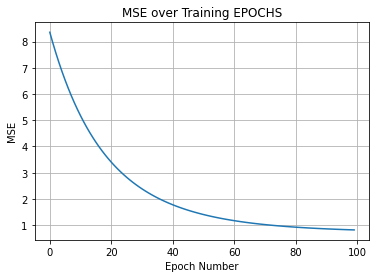

In [42]:
# Train for 100 epochs

EPOCHS = 100
mse_list = []
for i in range(EPOCHS):
    
    # Make some predictions using our basic model
    preds = model(X)
    
    # compute the loss
    loss = mse(preds, y)
    
    # print("MSE in epoch %d is %3.4f" % (i,loss.item()),"\n")
    if (i+1) % 5 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(i+1, EPOCHS, loss.item()))

    mse_list.append(loss.item())
    
    # compute gradients with respect to the weights and biases
    loss.backward()
    
    # adjust the weights using a learning rate and reset gradients
    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_() 
        
import matplotlib.pyplot as plt
pd.Series(mse_list).plot()
plt.xlabel("Epoch Number")
plt.ylabel("MSE")
plt.title("MSE over Training EPOCHS")
plt.grid()

In [43]:
# Calculate loss
preds = model(X)
loss = mse(preds, y)
print("Final loss computation is:",round(loss.item(),2))

Final loss computation is: 0.81


<h2>Linear Regression using PyTorch</h2>

<img src="pics/spinning.png" width ="400" height=400>

We've implemented linear regression & gradient descent model using some basic tensor operations and we even used our own loss function. However, since this is a common pattern in deep learning, PyTorch provides several built-in functions and classes to make it easy to create and train models with just a few lines of code. **Let's be more trustful of PyTorch and use more of its considerable capabilites**. Keep in mind that what we are doing is along the following lines:

1. Identify a target in our data and separate it from the predictors
2. Perform any normalization (not always required)
3. "Tensorfy" the X and y (target) structures
4. Feed them into a Data Loader which simplifies the creation of batches
5. Define an architecture for your model (e.g. layers, activation functions, dropouts)
   - This will be a function of number of features 
   - Eventual output will match the unique values of your target
6. Decide on a cost / loss function (e.g. MSE) to minimize
7. Pick an optimizer (e.g. SGD) to work in conjunction with number 5
8. Pick a learning rate for number 6.

Let's begin by importing the torch.nn package from PyTorch, which contains utility classes for building neural networks and ingesting data which simplifies downstream work. We'll use the **TensorDataset** function to help prep our X and y data from above. It's always a good idea to verify the type of data you have, specifically if it's already a tensor (nor not).

In [44]:
print("X is of type",type(X)," and has shape",X.shape)
print("y is of type",type(X)," and has shape",y.shape)

X is of type <class 'torch.Tensor'>  and has shape torch.Size([20640, 6])
y is of type <class 'torch.Tensor'>  and has shape torch.Size([20640, 1])


In [45]:
from torch.utils.data import TensorDataset
# Define dataset
train_ds = TensorDataset(X, y)
print("First three rows and of X and y are:",train_ds[0:3])

First three rows and of X and y are: (tensor([[ 2.3448,  0.9821,  0.6286, -0.1538, -0.9744, -0.0496],
        [ 2.3322, -0.6070,  0.3270, -0.2633,  0.8614, -0.0925],
        [ 1.7827,  1.8562,  1.1556, -0.0490, -0.8208, -0.0258]]), tensor([[4.5260],
        [3.5850],
        [3.5210]]))


### Data Loaders

One strength of PyTorch is its ability to manage very large data files which might require some form of subdivision to "feed" data into a network for efficient processing. While we could do this outselves it would be tedious. To this end, PyTorch has a class of utilities called **DataLoaders** which helps with this task.  

In this case, the <b>DataLoader</b> function can take a training dataset, (which itself has been prepared with **TensorDataset**) along with an indicated *batch_size*. We get back a series of X and y pairs, as tensors of course, which are then pushed <b><i>into the network</i></b>. When all batches have been processed we have completed one epoch. This includes foward and back propogation. And then for each subsequent epoch - we do it all again. 

<img src="pics/dataload.png" >


In [46]:
# Next, we will pass the train_ds into the DataLoader function
# which will chop it up into batches within a single object

from torch.utils.data import DataLoader
# Define data loader
batch_size = 1000   # Create batches of 1,000 each
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


So the DataLoader operation will give is an iterable structure that provides batches of 1000 rows of data at a time which in this case that our model / network will consume approximately 21 batchs of 1000 rows each. 20460/1000. We could change this of course and use it a source of experimentation. When all batches have been through the network once, we call this an EPOCH.

In [47]:
# Batch Loaders
batch_num = 1
for xb, yb in train_dl:
    print("Batch",batch_num,"Size of xb:",xb.shape,"Size of yb:",yb.shape)
    batch_num += 1
    

Batch 1 Size of xb: torch.Size([1000, 6]) Size of yb: torch.Size([1000, 1])
Batch 2 Size of xb: torch.Size([1000, 6]) Size of yb: torch.Size([1000, 1])
Batch 3 Size of xb: torch.Size([1000, 6]) Size of yb: torch.Size([1000, 1])
Batch 4 Size of xb: torch.Size([1000, 6]) Size of yb: torch.Size([1000, 1])
Batch 5 Size of xb: torch.Size([1000, 6]) Size of yb: torch.Size([1000, 1])
Batch 6 Size of xb: torch.Size([1000, 6]) Size of yb: torch.Size([1000, 1])
Batch 7 Size of xb: torch.Size([1000, 6]) Size of yb: torch.Size([1000, 1])
Batch 8 Size of xb: torch.Size([1000, 6]) Size of yb: torch.Size([1000, 1])
Batch 9 Size of xb: torch.Size([1000, 6]) Size of yb: torch.Size([1000, 1])
Batch 10 Size of xb: torch.Size([1000, 6]) Size of yb: torch.Size([1000, 1])
Batch 11 Size of xb: torch.Size([1000, 6]) Size of yb: torch.Size([1000, 1])
Batch 12 Size of xb: torch.Size([1000, 6]) Size of yb: torch.Size([1000, 1])
Batch 13 Size of xb: torch.Size([1000, 6]) Size of yb: torch.Size([1000, 1])
Batch 14

Next we can create a model which in this case is painfully simple. It's just a single Linear layer although this time we are actually using a PyTorch method. Remeber, in the previous example we used our set of equations (which was more or less a linear model).

It's worth it to point out that here, I am using the **Functional** interace to PyTorch as opposed to the Object Oriented interface which is commonly used when processing images. In reality, either approach works. It becomes a matter of taste and common practice within one's domain. I find the Functional interface a little less verbose but this is up to you. 

In [48]:
# Define model - number of predictors is 6
num_of_predictors = 6

# This comes from PyTorch
model = nn.Linear(num_of_predictors, 1)

print(model.weight)
print(model.bias)

# Parameters
list(model.parameters())

# Import nn.functional
import torch.nn.functional as F

# Define loss function - MSE
loss_fn = F.mse_loss

#loss = loss_fn(model(X), y, reduction="none")
loss = loss_fn(model(X), y)
#print(loss)

Parameter containing:
tensor([[ 0.1840, -0.2647, -0.0113, -0.3067, -0.1360,  0.0281]],
       requires_grad=True)
Parameter containing:
tensor([-0.1195], requires_grad=True)


In [49]:
# So we also need an optimizer to work in conjunction with our
# loss function. 

# Learning rate can impact this
opt = torch.optim.SGD(model.parameters(), lr=1e-3)

# This a function desgined to process 
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 5 == 0:
            print('Epoch [{}/{}], Training Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

fit(100, model, loss_fn, opt, train_dl)

Epoch [5/100], Training Loss: 4.1287
Epoch [10/100], Training Loss: 2.7784
Epoch [15/100], Training Loss: 2.2692
Epoch [20/100], Training Loss: 1.7123
Epoch [25/100], Training Loss: 1.3470
Epoch [30/100], Training Loss: 1.1267
Epoch [35/100], Training Loss: 0.9089
Epoch [40/100], Training Loss: 0.7933
Epoch [45/100], Training Loss: 0.8767
Epoch [50/100], Training Loss: 0.7525
Epoch [55/100], Training Loss: 0.6425
Epoch [60/100], Training Loss: 0.6929
Epoch [65/100], Training Loss: 0.6795
Epoch [70/100], Training Loss: 0.8030
Epoch [75/100], Training Loss: 0.6529
Epoch [80/100], Training Loss: 0.7419
Epoch [85/100], Training Loss: 0.6874
Epoch [90/100], Training Loss: 0.6547
Epoch [95/100], Training Loss: 0.7203
Epoch [100/100], Training Loss: 0.6642


## Things To Consider

1. What impact does the learning rate have on this process ? 
2. How about the batch size ? 
3. Do the number of Epochs matter ? 
4. How about choice of optimizer ? 
5. What about creating a more sophisticated model architecture ?
6. Have we learned anything about this model's applicability to unseen data ? 

<h2> Another Look At All of This </h2>

Okay, we've walked through the process of regression with a progressive immersion into the PyTorch way of doing things. This has been instructive but perhaps we should look at a more integrated example that more or less pulls it all together. There are also a few things we could do to make things more interesting:

### What have we done thus far ? 

1. We read in some "real" data (The California Housing Data)
2. We separated the predictors (X) from the target (y) which is Price
3. We then turned X and y into tensors
4. We then used the data as input into a NN
5. We plotted the resulting training error

### Then What ? 

1. Well we then took the X and y data and passed it into..
2. The TensorDataSet and DataLoader functions to get smaller input batches
3. We then re-ran the model on this to see the impact
4. This approach will work for much larger data sets

### Now What ? 

Well we have an opportunity to go a little deeper by separating the data into training and testing data which is how we might do this in so called real life. So, we'll start over by re-reading in the data and processing it would some scikit tools. 

We will also scale the X values since they are on different levels of measurement. This might (or not) make a big difference in the outcome but it's good practice. 


In [50]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We'll stick with the California data but let's read it in using a different approach. We will also attempt to carve off the first N number of records from the data to reserve for later use as a test data set. 

In [51]:

Xc = np.array(cal.drop('Price',axis=1), dtype='float32')
yc = np.array(cal.Price, dtype='float32')

# This fetches the X and y data
#(Xc,yc) = fetch_california_housing(return_X_y=True)

# Let's hold out 4,000 rows from the data to be used as test data
numtoholdout = 4000

# Now create a holdout / test set
Xhold = Xc[0:numtoholdout,]
yhold = yc[0:numtoholdout,]

# Create the training data
Xc = Xc[:-numtoholdout]
yc = yc[:-numtoholdout]

# Turn numpy structures into tensors
y = torch.tensor(yc,dtype=torch.float)
y = torch.unsqueeze(y,dim=1)

x = torch.tensor(Xc,dtype=torch.float)
#x = torch.tensor(Xc[:,0],dtype=torch.float)
#x = torch.unsqueeze(x,dim=1)
#
print(y.size())
print(x.size())


torch.Size([16640, 1])
torch.Size([16640, 6])


In [52]:
# Do the same for the holdout
yt = torch.tensor(yhold,dtype=torch.float)
yt = torch.unsqueeze(yt,dim=1)
#xt = torch.tensor(Xhold[:,0],dtype=torch.float)
xt = torch.tensor(Xhold,dtype=torch.float)
#xt = torch.unsqueeze(xt,dim=1)


Let's define a Sequential network that will contain more than just a single layer. We can experiment with this in any number of ways and you should feel free to do so. Many times there is not "right" architecture although the research in your domain of interest will frequently point to certain combinations of layers and whether to use drop puts. 

In [53]:
from torch.utils.data import DataLoader
nodes = 300
num_of_predictors = 6
net = torch.nn.Sequential(
#       torch.nn.Dropout(), 
        torch.nn.Linear(num_of_predictors, nodes),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(nodes, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)
#optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

# Figure out a batch size (this can be something to experiment with)
# For example, try 1000 instead of 2000
BATCH_SIZE = 2000

# Read the data with TensorDataset
train_ds = TensorDataset(x, y)

# Now load the torch_dataset stucture into DataLoader to chop it up
train_dl = DataLoader(dataset=train_ds, batch_size=BATCH_SIZE, shuffle=True)

Epoch [5/150], Train Loss: 121.9610, Test Loss: 93.6237
Epoch [10/150], Train Loss: 3.0984, Test Loss: 2.1441
Epoch [15/150], Train Loss: 2.0655, Test Loss: 1.5266
Epoch [20/150], Train Loss: 2.0312, Test Loss: 1.4992
Epoch [25/150], Train Loss: 2.0078, Test Loss: 1.4834
Epoch [30/150], Train Loss: 2.0359, Test Loss: 1.4787
Epoch [35/150], Train Loss: 1.9537, Test Loss: 1.4978
Epoch [40/150], Train Loss: 1.9259, Test Loss: 1.5029
Epoch [45/150], Train Loss: 1.8961, Test Loss: 1.5161
Epoch [50/150], Train Loss: 1.8825, Test Loss: 1.5182
Epoch [55/150], Train Loss: 1.8664, Test Loss: 1.5388
Epoch [60/150], Train Loss: 1.8516, Test Loss: 1.5311
Epoch [65/150], Train Loss: 1.8633, Test Loss: 1.5353
Epoch [70/150], Train Loss: 1.8230, Test Loss: 1.5335
Epoch [75/150], Train Loss: 1.8354, Test Loss: 1.5179
Epoch [80/150], Train Loss: 1.8088, Test Loss: 1.5227
Epoch [85/150], Train Loss: 1.7859, Test Loss: 1.5141
Epoch [90/150], Train Loss: 1.7665, Test Loss: 1.4948
Epoch [95/150], Train Loss

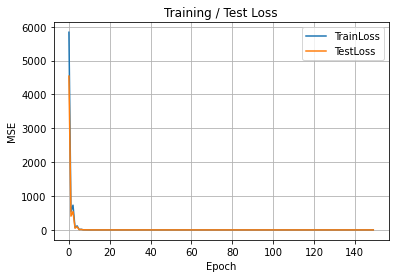

In [54]:
# Set up some accumulators for average training and test loss
EPOCH = 150
avloss = []
avtestloss = []
for epoch in range(EPOCH):
    acc_loss = []
    test_loss = []
    for step, (batch_x, batch_y) in enumerate(train_dl): # for each training ste
        
        b_x = batch_x
        b_y = batch_y

        # Get the training loss per batch
        prediction = net(b_x)     # input x and predict based on x
        loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)
        acc_loss.append(loss.item())
        
        # Get the test loss per batch
        testpred = net(xt)
        predloss = loss_func(testpred,yt)
        test_loss.append(predloss.item())

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        
        # print("Epoch %d: Train Loss %6.4f, Test Loss %6.4f" % (epoch,np.mean(acc_loss),np.mean(test_loss)))
    
    avloss.append(np.mean(acc_loss))
    avtestloss.append(np.mean(test_loss))
    
    if (epoch+1) % 5 == 0:
        print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch+1, EPOCH, np.mean(acc_loss),np.mean(test_loss)))

d = {'TrainLoss':avloss,'TestLoss':avtestloss}
errdf = pd.DataFrame(d)

errdf.plot.line()
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.title("Training / Test Loss")
plt.grid()

## Make a Function

So what happened above? We chopped the data up into batches. Well we didn't do that, the DataLoader did it for us. In any case we processed each batch during which we:

1. Trained the model on the X data for that batch
2. Observed the training error by making training predictions
3. Observed the testing error by making predictions using the test data

So now we could make a function to encapsulate that acitvity. We could also make functions to setup the model, select an optimizer, and indicate things like batch sizes. But we'll start with just the training activity. 

In [55]:
# Summary

# Setup a model called "net"
nodes = 200
num_of_predictors = 6

net = torch.nn.Sequential(
#       torch.nn.Dropout(), 
        torch.nn.Linear(num_of_predictors, nodes),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(nodes, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
)

# The optimizer type and learning rate can impact performance
#opt = torch.optim.SGD(net.parameters(), lr=1e-4)
opt = torch.optim.Adam(net.parameters(), lr=0.0001)

# Establish a loss function
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

# 
# This a function designed to process the data using the above 
# Note we could experiment with different epochs, models, loss functions
# and optimizers using this approach
#

def fit(num_epochs, model, loss_fn, opt, train_dl):

    avloss = []
    avtestloss = []
    
    for epoch in range(num_epochs):
        acc_loss = []
        test_loss = []
        for step, (batch_x, batch_y) in enumerate(train_dl): 
            b_x = batch_x
            b_y = batch_y

        # Get the training loss per batch
            prediction = model(b_x)     # input x and predict based on x
            loss = loss_fn(prediction, b_y)     # must be (1. nn output, 2. target)
            acc_loss.append(loss.item())
        
        # Get the test loss per batch
            testpred = model(xt)
            predloss = loss_fn(testpred,yt)
            test_loss.append(predloss.item())

            opt.zero_grad()   # clear gradients for next train
            loss.backward()         # backpropagation, compute gradients
            opt.step()        # apply gradients
        
            #print("Epoch %d: Train Loss %6.4f, Test Loss %6.4f" % (epoch,np.mean(acc_loss),np.mean(test_loss)))
    
        avloss.append(np.mean(acc_loss))
        avtestloss.append(np.mean(test_loss))
    
        if (epoch+1) % 5 == 0:
             print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch+1, num_epochs, np.mean(acc_loss),np.mean(test_loss)))

    d = {'TrainLoss':avloss,'TestLoss':avtestloss}
    errdf = pd.DataFrame(d)
    return errdf

# Now call the function
holddf = fit(150, net, loss_func, opt, train_dl)

Epoch [5/150], Train Loss: 2.7670, Test Loss: 1.6420
Epoch [10/150], Train Loss: 1.5819, Test Loss: 0.9163
Epoch [15/150], Train Loss: 1.3755, Test Loss: 0.9224
Epoch [20/150], Train Loss: 1.3113, Test Loss: 0.9839
Epoch [25/150], Train Loss: 1.2828, Test Loss: 0.9939
Epoch [30/150], Train Loss: 1.2548, Test Loss: 0.9972
Epoch [35/150], Train Loss: 1.2055, Test Loss: 0.9800
Epoch [40/150], Train Loss: 1.1563, Test Loss: 0.9376
Epoch [45/150], Train Loss: 1.1169, Test Loss: 0.9026
Epoch [50/150], Train Loss: 1.0708, Test Loss: 0.8777
Epoch [55/150], Train Loss: 1.0544, Test Loss: 0.8615
Epoch [60/150], Train Loss: 1.0213, Test Loss: 0.8311
Epoch [65/150], Train Loss: 1.0087, Test Loss: 0.8182
Epoch [70/150], Train Loss: 0.9860, Test Loss: 0.7988
Epoch [75/150], Train Loss: 0.9758, Test Loss: 0.7787
Epoch [80/150], Train Loss: 0.9439, Test Loss: 0.7603
Epoch [85/150], Train Loss: 0.9203, Test Loss: 0.7446
Epoch [90/150], Train Loss: 0.9056, Test Loss: 0.7269
Epoch [95/150], Train Loss: 0

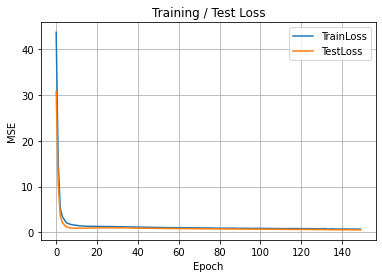

In [56]:
# Plot the errors 
holddf.plot.line()
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.title("Training / Test Loss")
plt.grid()